In [332]:
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import pickle

print('Setup Complete')

Setup Complete


In [333]:
data_preprocessed = pd.read_csv('/Users/kevin/Desktop/absenteeism/1.2 df_preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [334]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [335]:
data_preprocessed['Absenteeism Time in Hours'].mean()

6.761428571428572

In [336]:
data_preprocessed['Absenteeism Time in Hours'].mode()

0    8
dtype: int64

<AxesSubplot:xlabel='Absenteeism Time in Hours', ylabel='count'>

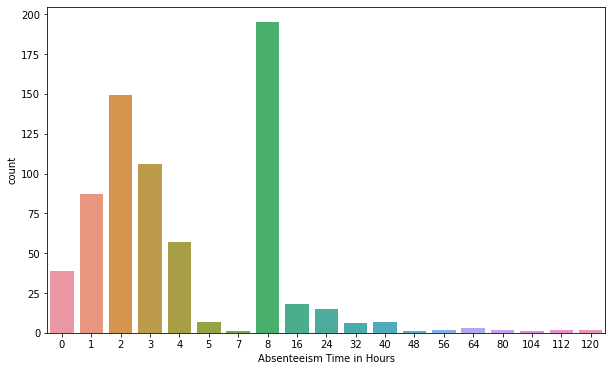

In [337]:
plt.figure(figsize=(10,6))
sns.countplot(x = data_preprocessed['Absenteeism Time in Hours'])

In [338]:
data_preprocessed

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2


In [339]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [340]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [341]:
data_preprocessed['Excessive Absenteeism'] = targets

In [342]:
data_preprocessed

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3,0
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2,0


In [343]:
data_preprocessed['Excessive Absenteeism'].mean()

0.45571428571428574

In [344]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Day of the Week',
                                            'Daily Work Load Average','Distance to Work'],axis=1)

In [345]:
data_with_targets is data_preprocessed

False

In [346]:
data_with_targets

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [347]:
data_with_targets.iloc[:,:14]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [348]:
unscaled_inputs = data_with_targets.iloc[:,:-1]
unscaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


In [349]:
absenteeism_scaler = StandardScaler()

In [350]:
class CustomScaler(BaseEstimator,TransformerMixin): 
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean = None
        self.var = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean = np.mean(X[self.columns])
        self.var = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [351]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [352]:
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [353]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [354]:
columns_to_scale

['Month Value',
 'Transportation Expense',
 'Age',
 'Body Mass Index',
 'Children',
 'Pets']

In [355]:
absenteeism_scaler = CustomScaler(columns_to_scale)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [356]:
scaled_values = absenteeism_scaler.fit(unscaled_inputs)

In [357]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [358]:
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [359]:
scaled_inputs.shape

(700, 11)

In [360]:
train_test_split(scaled_inputs, targets)

[     Reason_1  Reason_2  Reason_3  Reason_4  Month Value  \
 449         0         0         0         1    -0.102784   
 40          0         0         0         1     0.753746   
 454         0         0         0         1    -0.102784   
 219         0         0         0         1    -0.388293   
 473         0         0         0         1     0.182726   
 ..        ...       ...       ...       ...          ...   
 592         0         0         0         1    -1.244823   
 81          0         0         0         1     1.324766   
 599         0         0         0         1    -1.244823   
 295         1         0         0         0     1.039256   
 621         0         0         0         1    -0.959313   
 
      Transportation Expense       Age  Body Mass Index  Education  Children  \
 449                0.356940  0.718933        -0.878984          0 -0.919030   
 40                -0.578689 -1.477309        -1.349389          0 -0.919030   
 454               -1.5746

In [361]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [362]:
print (x_train.shape, y_train.shape)

(560, 11) (560,)


In [363]:
print (x_test.shape, y_test.shape)

(140, 11) (140,)


In [364]:
reg = LogisticRegression()

In [365]:
reg.fit(x_train,y_train)

LogisticRegression()

In [366]:
reg.score(x_train,y_train)

0.7732142857142857

In [367]:
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [368]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [369]:
model_outputs == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [370]:
np.sum((model_outputs==y_train))

433

In [371]:
model_outputs.shape[0]

560

In [372]:
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.7732142857142857

In [373]:
reg.intercept_

array([-1.6474549])

In [374]:
reg.coef_

array([[ 2.80019733,  0.95188356,  3.11555338,  0.83900082,  0.1589299 ,
         0.60528415, -0.16989096,  0.27981088, -0.21053312,  0.34826214,
        -0.27739602]])

In [375]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [376]:
feature_name = unscaled_inputs.columns.values

In [377]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Feature name,Coefficient
0,Reason_1,2.800197
1,Reason_2,0.951884
2,Reason_3,3.115553
3,Reason_4,0.839001
4,Month Value,0.158930
5,Transportation Expense,0.605284
6,Age,-0.169891
7,Body Mass Index,0.279811
8,Education,-0.210533
9,Children,0.348262


In [378]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.647455
1,Reason_1,2.800197
2,Reason_2,0.951884
3,Reason_3,3.115553
4,Reason_4,0.839001
5,Month Value,0.158930
6,Transportation Expense,0.605284
7,Age,-0.169891
8,Body Mass Index,0.279811
9,Education,-0.210533


In [379]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [380]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-1.647455,0.192539
1,Reason_1,2.800197,16.447892
2,Reason_2,0.951884,2.590585
3,Reason_3,3.115553,22.545903
4,Reason_4,0.839001,2.314054
5,Month Value,0.158930,1.172256
6,Transportation Expense,0.605284,1.831773
7,Age,-0.169891,0.843757
8,Body Mass Index,0.279811,1.322880
9,Education,-0.210533,0.810152


In [381]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.115553,22.545903
1,Reason_1,2.800197,16.447892
2,Reason_2,0.951884,2.590585
4,Reason_4,0.839001,2.314054
6,Transportation Expense,0.605284,1.831773
10,Children,0.348262,1.416604
8,Body Mass Index,0.279811,1.322880
5,Month Value,0.158930,1.172256
7,Age,-0.169891,0.843757
9,Education,-0.210533,0.810152


In [382]:
reg.score(x_test,y_test)

0.75

In [383]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.71340413, 0.28659587],
       [0.58724228, 0.41275772],
       [0.44020821, 0.55979179],
       [0.78159464, 0.21840536],
       [0.08410854, 0.91589146],
       [0.33487603, 0.66512397],
       [0.29984576, 0.70015424],
       [0.13103971, 0.86896029],
       [0.78625404, 0.21374596],
       [0.74903632, 0.25096368],
       [0.49397598, 0.50602402],
       [0.22484913, 0.77515087],
       [0.07129151, 0.92870849],
       [0.73178133, 0.26821867],
       [0.30934135, 0.69065865],
       [0.5471671 , 0.4528329 ],
       [0.55052275, 0.44947725],
       [0.5392707 , 0.4607293 ],
       [0.40201117, 0.59798883],
       [0.05361575, 0.94638425],
       [0.7003009 , 0.2996991 ],
       [0.78159464, 0.21840536],
       [0.42037128, 0.57962872],
       [0.42037128, 0.57962872],
       [0.24783565, 0.75216435],
       [0.74566259, 0.25433741],
       [0.51017274, 0.48982726],
       [0.85690195, 0.14309805],
       [0.20349733, 0.79650267],
       [0.78159464, 0.21840536],
       [0.

In [384]:
predicted_proba.shape

(140, 2)

In [385]:
predicted_proba[:,1]

array([0.28659587, 0.41275772, 0.55979179, 0.21840536, 0.91589146,
       0.66512397, 0.70015424, 0.86896029, 0.21374596, 0.25096368,
       0.50602402, 0.77515087, 0.92870849, 0.26821867, 0.69065865,
       0.4528329 , 0.44947725, 0.4607293 , 0.59798883, 0.94638425,
       0.2996991 , 0.21840536, 0.57962872, 0.57962872, 0.75216435,
       0.25433741, 0.48982726, 0.14309805, 0.79650267, 0.21840536,
       0.36956558, 0.67906035, 0.68502567, 0.52868083, 0.21840536,
       0.53506551, 0.22147081, 0.73692105, 0.40498044, 0.60505988,
       0.21075848, 0.45224466, 0.23751292, 0.39833498, 0.82755447,
       0.56797575, 0.69113325, 0.28659587, 0.21935267, 0.2033097 ,
       0.57628256, 0.3294664 , 0.66512397, 0.26949499, 0.83321968,
       0.43491525, 0.88374612, 0.23127072, 0.33415858, 0.34432939,
       0.69909345, 0.65494263, 0.29244941, 0.79200758, 0.20750276,
       0.26840558, 0.08708566, 0.22147081, 0.73245417, 0.30530219,
       0.22147081, 0.29014408, 0.90438191, 0.46061297, 0.60174

In [386]:
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [387]:
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)